In [20]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
dir_sp_train = './spiral/training'
dir_sp_test = './spiral/testing'
dir_wv_train = './wave/training'
dir_wv_test = './wave/testing'

In [3]:
Name=[]
for file in os.listdir(dir_sp_train):
    Name+=[file]
print(Name)
print(len(Name))

['healthy', 'parkinson']
2


In [4]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [5]:
dataset_sp=[]
count=0
for file in os.listdir(dir_sp_train):
    path=os.path.join(dir_sp_train,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
        image=img_to_array(image)
        image=image/255.0
        dataset_sp.append([image,count])
    count=count+1
    
testset_sp=[]
count=0
for file in os.listdir(dir_sp_test):
    path=os.path.join(dir_sp_test,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
        image=img_to_array(image)
        image=image/255.0
        testset_sp.append([image,count])
    count=count+1    

In [6]:
dataset_wv=[]
count=0
for file in os.listdir(dir_wv_train):
    path=os.path.join(dir_wv_train,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
        image=img_to_array(image)
        image=image/255.0
        dataset_wv.append([image,count])
    count=count+1
    
testset_wv=[]
count=0
for file in os.listdir(dir_wv_test):
    path=os.path.join(dir_wv_test,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
        image=img_to_array(image)
        image=image/255.0
        testset_wv.append([image,count])
    count=count+1   

In [7]:
data_sp,labels_sp0=zip(*dataset_sp)
test_sp,tlabels_sp0=zip(*testset_sp)

data_wv,labels_wv0=zip(*dataset_wv)
test_wv,tlabels_wv0=zip(*testset_wv)

In [8]:
labels_sp1=to_categorical(labels_sp0)
data_sp=np.array(data_sp)
labels_sp=np.array(labels_sp1)

tlabels_sp1=to_categorical(tlabels_sp0)
test_sp=np.array(test_sp)
tlabels_sp=np.array(tlabels_sp1)

In [9]:
labels_wv1=to_categorical(labels_wv0)
data_wv=np.array(data_wv)
labels_wv=np.array(labels_wv1)

tlabels_wv1=to_categorical(tlabels_wv0)
test_wv=np.array(test_wv)
tlabels_wv=np.array(tlabels_wv1)

In [10]:
trainx_sp,testx_sp,trainy_sp,testy_sp=train_test_split(data_sp,labels_sp,test_size=0.2,random_state=44)
trainx_wv,testx_wv,trainy_wv,testy_wv=train_test_split(data_wv,labels_wv,test_size=0.2,random_state=44)

In [11]:
print(trainx_sp.shape)
print(testx_sp.shape)
print(trainy_sp.shape)
print(testy_sp.shape)

(57, 100, 100, 3)
(15, 100, 100, 3)
(57, 2)
(15, 2)


In [12]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [13]:
pretrained_model1 = tf.keras.applications.DenseNet201(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model1.trainable = False

pretrained_model2 = tf.keras.applications.MobileNetV2(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model2.trainable = False

In [14]:
pretrained_model3 = tf.keras.applications.ResNet50(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

pretrained_model4 = tf.keras.applications.VGG16(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model4.trainable = False

In [15]:
inputs1 = pretrained_model1.input
x1 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model1.output)
outputs1 = tf.keras.layers.Dense(2, activation='softmax')(x1)
model1 = tf.keras.Model(inputs=inputs1, outputs=outputs1)

inputs2 = pretrained_model2.input
x2 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model2.output)
outputs2 = tf.keras.layers.Dense(2, activation='softmax')(x2)
model2 = tf.keras.Model(inputs=inputs2, outputs=outputs2)

inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(2, activation='softmax')(x3)
model3 = tf.keras.Model(inputs=inputs3, outputs=outputs3)

inputs4 = pretrained_model4.input
x4 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model4.output)
outputs4 = tf.keras.layers.Dense(2, activation='softmax')(x4)
model4 = tf.keras.Model(inputs=inputs4, outputs=outputs4)

In [16]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
print("Training Spiral Set")

print("Start - 1...!")
his1s=model1.fit(datagen.flow(trainx_sp,trainy_sp,batch_size=32),validation_data=(testx_sp,testy_sp),epochs=50)
print("End 1")

print("Start - 2...!")
his2s=model2.fit(datagen.flow(trainx_sp,trainy_sp,batch_size=32),validation_data=(testx_sp,testy_sp),epochs=50)
print("End 2")

print("Start - 3...!")
his3s=model3.fit(datagen.flow(trainx_sp,trainy_sp,batch_size=32),validation_data=(testx_sp,testy_sp),epochs=50)
print("End 3")

print("Start - 4...!")
his4s=model4.fit(datagen.flow(trainx_sp,trainy_sp,batch_size=32),validation_data=(testx_sp,testy_sp),epochs=50)
print("End 4")

print("--------------------------------")
print("Training Wave Set")

print("Start - 1...!")
his1w=model1.fit(datagen.flow(trainx_wv,trainy_wv,batch_size=32),validation_data=(testx_wv,testy_wv),epochs=50)
print("End 1")

print("Start - 2...!")
his2w=model2.fit(datagen.flow(trainx_wv,trainy_wv,batch_size=32),validation_data=(testx_wv,testy_wv),epochs=50)
print("End 2")

print("Start - 3...!")
his3w=model3.fit(datagen.flow(trainx_wv,trainy_wv,batch_size=32),validation_data=(testx_wv,testy_wv),epochs=50)
print("End 3")

print("Start - 4...!")
his4w=model4.fit(datagen.flow(trainx_wv,trainy_wv,batch_size=32),validation_data=(testx_wv,testy_wv),epochs=50)
print("End 4")



Training Spiral Set
Start - 1...!
Epoch 1/50
2/2 [==============================] - 13s 5s/step - loss: 0.5033 - accuracy: 0.7719 - val_loss: 0.2762 - val_accuracy: 0.8667
Epoch 2/50
2/2 [==============================] - 2s 1s/step - loss: 0.4142 - accuracy: 0.7895 - val_loss: 0.6081 - val_accuracy: 0.6667
Epoch 3/50
2/2 [==============================] - 2s 1s/step - loss: 0.5917 - accuracy: 0.6316 - val_loss: 0.2763 - val_accuracy: 0.8667
Epoch 4/50
2/2 [==============================] - 2s 1s/step - loss: 0.3679 - accuracy: 0.7719 - val_loss: 0.4170 - val_accuracy: 0.8000
Epoch 5/50
2/2 [==============================] - 2s 1s/step - loss: 0.4765 - accuracy: 0.7895 - val_loss: 0.2852 - val_accuracy: 0.9333
Epoch 6/50
2/2 [==============================] - 3s 987ms/step - loss: 0.3348 - accuracy: 0.8246 - val_loss: 0.3390 - val_accuracy: 0.8000
Epoch 7/50
2/2 [==============================] - 2s 994ms/step - loss: 0.3037 - accuracy: 0.9123 - val_loss: 0.2925 - val_accuracy: 0.8000


In [24]:
#spiral1
y_pred_sp=model1.predict(testx_sp)
pred_sp=np.argmax(y_pred_sp,axis=1)
ground_sp = np.argmax(testy_sp,axis=1)
print(classification_report(ground_sp,pred_sp))

#spiral2
y_pred_sp=model2.predict(testx_sp)
pred_sp=np.argmax(y_pred_sp,axis=1)
ground_sp = np.argmax(testy_sp,axis=1)
print(classification_report(ground_sp,pred_sp))

#spiral3
y_pred_sp=model3.predict(testx_sp)
pred_sp=np.argmax(y_pred_sp,axis=1)
ground_sp = np.argmax(testy_sp,axis=1)
print(classification_report(ground_sp,pred_sp))

#spiral4
y_pred_sp=model4.predict(testx_sp)
pred_sp=np.argmax(y_pred_sp,axis=1)
ground_sp = np.argmax(testy_sp,axis=1)
print(classification_report(ground_sp,pred_sp))

1/1 [==============================] - 4s 4s/step
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.82      1.00      0.90         9

    accuracy                           0.87        15
   macro avg       0.91      0.83      0.85        15
weighted avg       0.89      0.87      0.86        15

1/1 [==============================] - 1s 818ms/step
              precision    recall  f1-score   support

           0       0.55      1.00      0.71         6
           1       1.00      0.44      0.62         9

    accuracy                           0.67        15
   macro avg       0.77      0.72      0.66        15
weighted avg       0.82      0.67      0.65        15

1/1 [==============================] - 1s 1s/step
              precision    recall  f1-score   support

           0       0.33      0.17      0.22         6
           1       0.58      0.78      0.67         9

    accuracy                 

In [25]:
#wave
y_pred_wv=model1.predict(testx_wv)
pred_wv=np.argmax(y_pred_wv,axis=1)
ground_wv = np.argmax(testy_wv,axis=1)
print(classification_report(ground_wv,pred_wv))

#wave
y_pred_wv=model2.predict(testx_wv)
pred_wv=np.argmax(y_pred_wv,axis=1)
ground_wv = np.argmax(testy_wv,axis=1)
print(classification_report(ground_wv,pred_wv))

#wave
y_pred_wv=model3.predict(testx_wv)
pred_wv=np.argmax(y_pred_wv,axis=1)
ground_wv = np.argmax(testy_wv,axis=1)
print(classification_report(ground_wv,pred_wv))

#wave
y_pred_wv=model4.predict(testx_wv)
pred_wv=np.argmax(y_pred_wv,axis=1)
ground_wv = np.argmax(testy_wv,axis=1)
print(classification_report(ground_wv,pred_wv))

1/1 [==============================] - 0s 369ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         9

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

1/1 [==============================] - 0s 85ms/step
              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.86      0.67      0.75         9

    accuracy                           0.73        15
   macro avg       0.74      0.75      0.73        15
weighted avg       0.76      0.73      0.74        15

1/1 [==============================] - 0s 245ms/step
              precision    recall  f1-score   support

           0       0.44      0.67      0.53         6
           1       0.67      0.44      0.53         9

    accuracy            

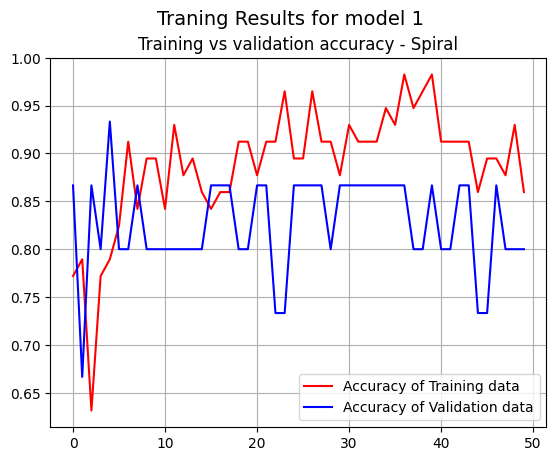

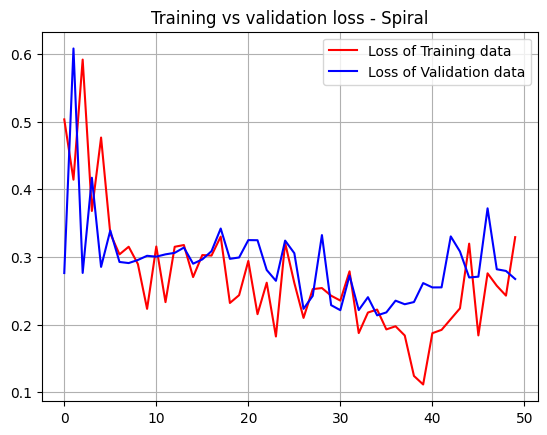

In [26]:
get_acc1s = his1s.history['accuracy']
value_acc1s = his1s.history['val_accuracy']
get_loss1s = his1s.history['loss']
validation_loss1s = his1s.history['val_loss']


plt.figure()
plt.suptitle('Traning Results for model 1', fontsize=14)
epochs1s = range(len(get_acc1s))
plt.plot(epochs1s, get_acc1s, 'r', label='Accuracy of Training data')
plt.plot(epochs1s, value_acc1s, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy - Spiral')
plt.legend(loc=0)
plt.grid()


plt.figure()
epochs1s = range(len(get_loss1s))
plt.plot(epochs1s, get_loss1s, 'r', label='Loss of Training data')
plt.plot(epochs1s, validation_loss1s, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss - Spiral')
plt.legend(loc=0)
plt.grid()


plt.show()

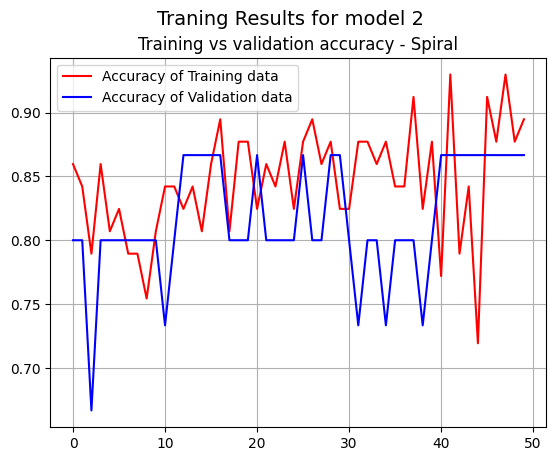

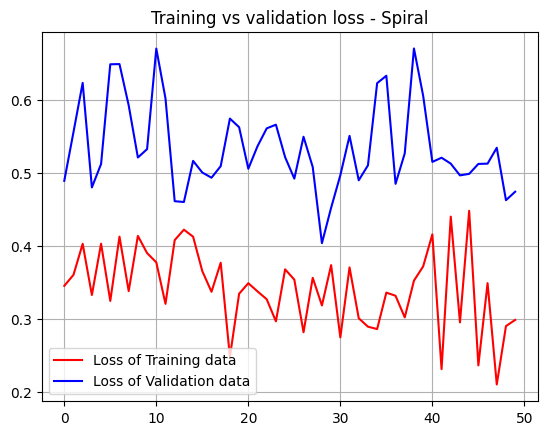

In [27]:
get_acc2s = his2s.history['accuracy']
value_acc2s = his2s.history['val_accuracy']
get_loss2s = his2s.history['loss']
validation_loss2s = his2s.history['val_loss']

plt.figure()
plt.suptitle('Traning Results for model 2', fontsize=14)
epochs2s = range(len(get_acc2s))
plt.plot(epochs1s, get_acc2s, 'r', label='Accuracy of Training data')
plt.plot(epochs1s, value_acc2s, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy - Spiral')
plt.legend(loc=0)
plt.grid()

plt.figure()
epochs2s = range(len(get_loss2s))
plt.plot(epochs2s, get_loss2s, 'r', label='Loss of Training data')
plt.plot(epochs2s, validation_loss2s, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss - Spiral')
plt.legend(loc=0)
plt.grid()


plt.show()

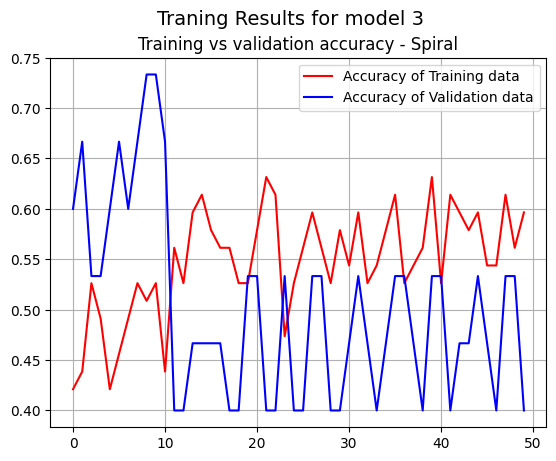

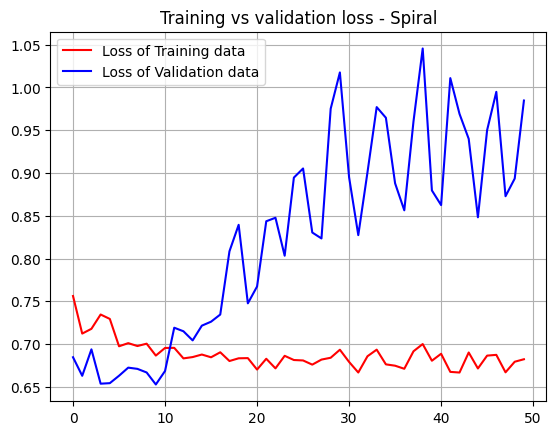

In [28]:
get_acc3s = his3s.history['accuracy']
value_acc3s = his3s.history['val_accuracy']
get_loss3s = his3s.history['loss']
validation_loss3s = his3s.history['val_loss']

plt.figure()
plt.suptitle('Traning Results for model 3', fontsize=14)
epochs3s = range(len(get_acc3s))
plt.plot(epochs3s, get_acc3s, 'r', label='Accuracy of Training data')
plt.plot(epochs3s, value_acc3s, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy - Spiral')
plt.legend(loc=0)
plt.grid()


plt.figure()
epochs3s = range(len(get_loss3s))
plt.plot(epochs3s, get_loss3s, 'r', label='Loss of Training data')
plt.plot(epochs3s, validation_loss3s, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss - Spiral')
plt.legend(loc=0)
plt.grid()


plt.show()

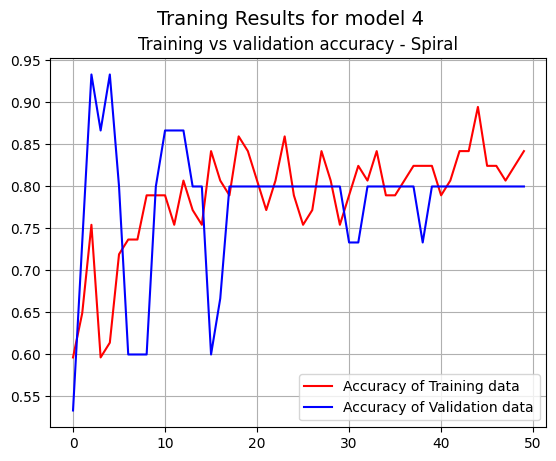

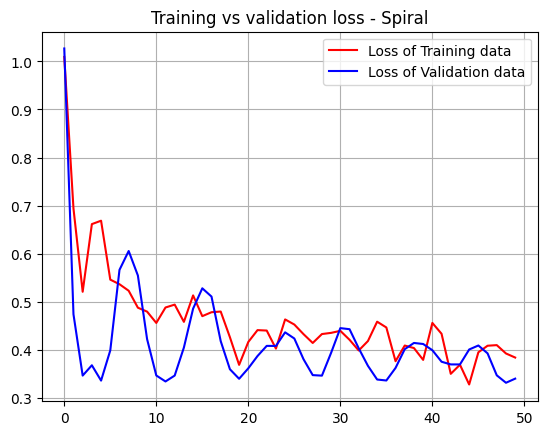

In [29]:
get_acc4s = his4s.history['accuracy']
value_acc4s = his4s.history['val_accuracy']
get_loss4s = his4s.history['loss']
validation_loss4s = his4s.history['val_loss']

plt.figure()
plt.suptitle('Traning Results for model 4', fontsize=14)
epochs4s = range(len(get_acc4s))
plt.plot(epochs4s, get_acc4s, 'r', label='Accuracy of Training data')
plt.plot(epochs4s, value_acc4s, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy - Spiral')
plt.legend(loc=0)
plt.grid()

plt.figure()
epochs4s = range(len(get_loss4s))
plt.plot(epochs4s, get_loss4s, 'r', label='Loss of Training data')
plt.plot(epochs4s, validation_loss4s, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss - Spiral')
plt.legend(loc=0)
plt.grid()


plt.show()

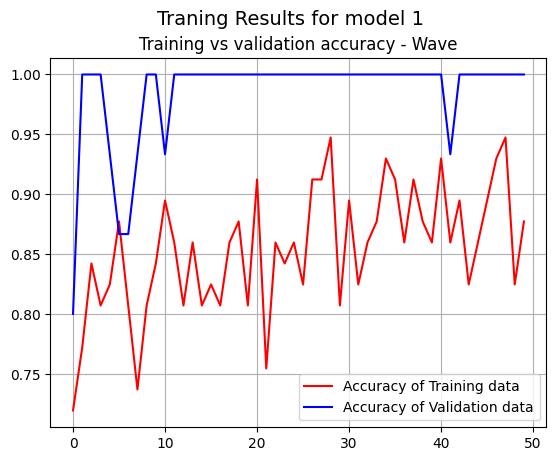

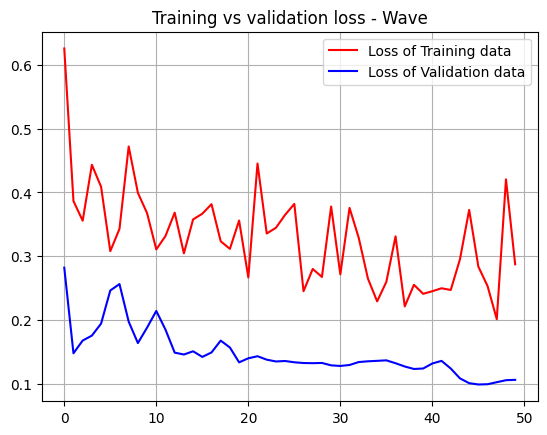

In [30]:
get_acc1w = his1w.history['accuracy']
value_acc1w = his1w.history['val_accuracy']
get_loss1w = his1w.history['loss']
validation_loss1w = his1w.history['val_loss']

plt.figure()
plt.suptitle('Traning Results for model 1', fontsize=14)
epochs1w = range(len(get_acc1w))
plt.plot(epochs1w, get_acc1w, 'r', label='Accuracy of Training data')
plt.plot(epochs1w, value_acc1w, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy - Wave')
plt.legend(loc=0)
plt.grid()

plt.figure()
epochs1w = range(len(get_loss1w))
plt.plot(epochs1w, get_loss1w, 'r', label='Loss of Training data')
plt.plot(epochs1w, validation_loss1w, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss - Wave')
plt.legend(loc=0)
plt.grid()

plt.show()

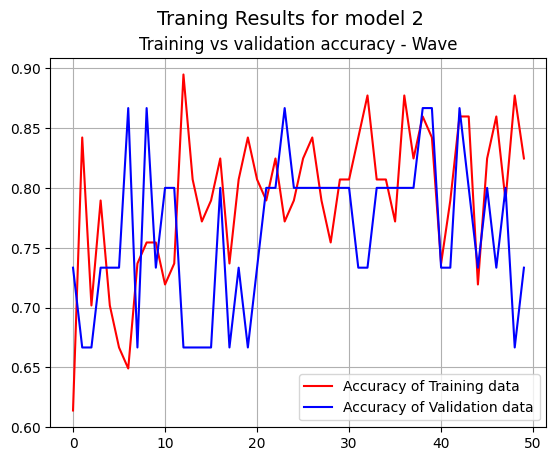

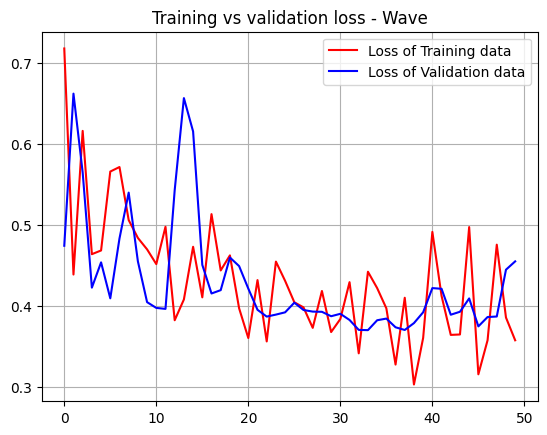

In [31]:
get_acc2w = his2w.history['accuracy']
value_acc2w = his2w.history['val_accuracy']
get_loss2w = his2w.history['loss']
validation_loss2w = his2w.history['val_loss']

plt.figure()
plt.suptitle('Traning Results for model 2', fontsize=14)
epochs2w = range(len(get_acc2w))
plt.plot(epochs2w, get_acc2w, 'r', label='Accuracy of Training data')
plt.plot(epochs2w, value_acc2w, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy - Wave')
plt.legend(loc=0)
plt.grid()

plt.figure()
epochs2w = range(len(get_loss2w))
plt.plot(epochs2w, get_loss2w, 'r', label='Loss of Training data')
plt.plot(epochs2w, validation_loss2w, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss - Wave')
plt.legend(loc=0)
plt.grid()


plt.show()

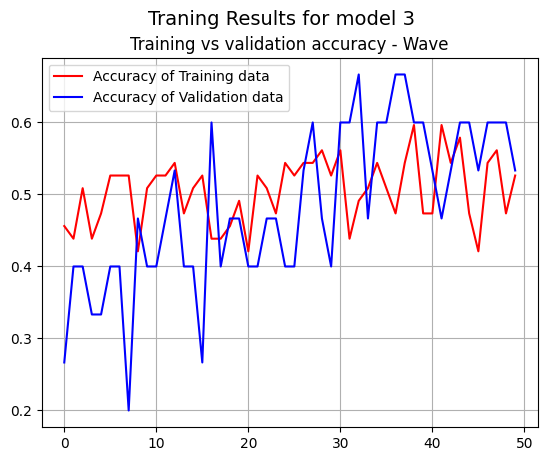

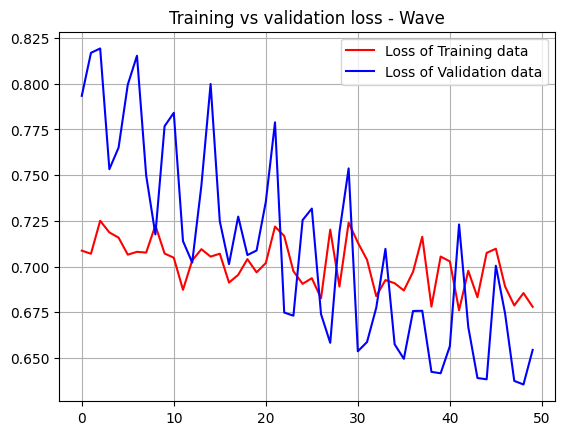

In [32]:
get_acc3w = his3w.history['accuracy']
value_acc3w = his3w.history['val_accuracy']
get_loss3w = his3w.history['loss']
validation_loss3w = his3w.history['val_loss']

plt.figure()
plt.suptitle('Traning Results for model 3', fontsize=14)
epochs3w = range(len(get_acc3w))
plt.plot(epochs3w, get_acc3w, 'r', label='Accuracy of Training data')
plt.plot(epochs3w, value_acc3w, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy - Wave')
plt.legend(loc=0)
plt.grid()


plt.figure()
epochs3w = range(len(get_loss3w))
plt.plot(epochs3w, get_loss3w, 'r', label='Loss of Training data')
plt.plot(epochs3w, validation_loss3w, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss - Wave')
plt.legend(loc=0)
plt.grid()


plt.show()

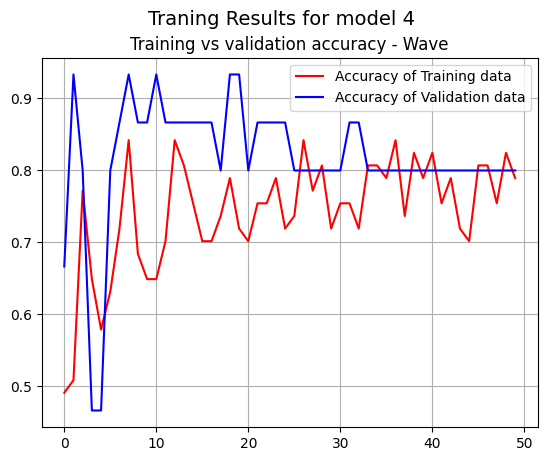

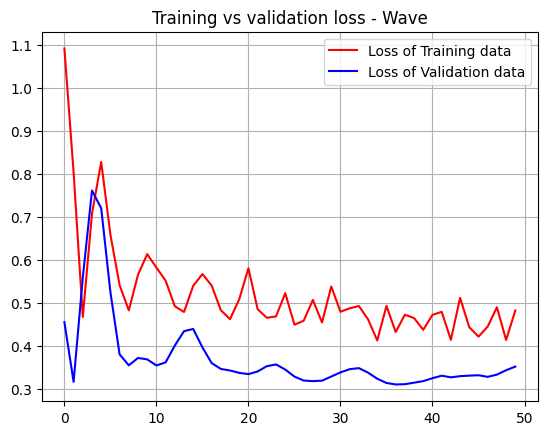

In [33]:
get_acc4w = his4w.history['accuracy']
value_acc4w = his4w.history['val_accuracy']
get_loss4w = his4w.history['loss']
validation_loss4w = his4w.history['val_loss']

plt.figure()
plt.suptitle('Traning Results for model 4', fontsize=14)
epochs4w = range(len(get_acc4w))
plt.plot(epochs4w, get_acc4w, 'r', label='Accuracy of Training data')
plt.plot(epochs4w, value_acc4w, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy - Wave')
plt.legend(loc=0)
plt.grid()

plt.figure()
epochs4w = range(len(get_loss4w))
plt.plot(epochs4w, get_loss4w, 'r', label='Loss of Training data')
plt.plot(epochs4w, validation_loss4w, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss - Wave')
plt.legend(loc=0)
plt.grid()


plt.show()

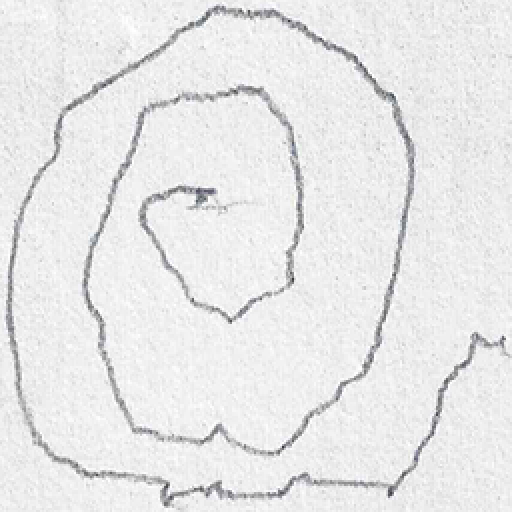

In [34]:
load_img("./spiral/testing/parkinson/V03PE07.png",target_size=(512,512))

In [35]:
image=load_img("./spiral/testing/parkinson/V03PE07.png",target_size=(100,100))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image=np.expand_dims(image, axis=0)

prediction=model1.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print(f"Prediction using model 1 is {move_name}.")

prediction=model2.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print(f"Prediction using model 2 is {move_name}.")

prediction=model3.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print(f"Prediction using model 3 is {move_name}.")

prediction=model4.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print(f"Prediction using model 4 is {move_name}.")

1/1 [==============================] - 0s 100ms/step
Prediction using model 1 is parkinson.
1/1 [==============================] - 0s 32ms/step
Prediction using model 2 is healthy.
1/1 [==============================] - 0s 58ms/step
Prediction using model 3 is parkinson.
1/1 [==============================] - 0s 59ms/step
Prediction using model 4 is healthy.


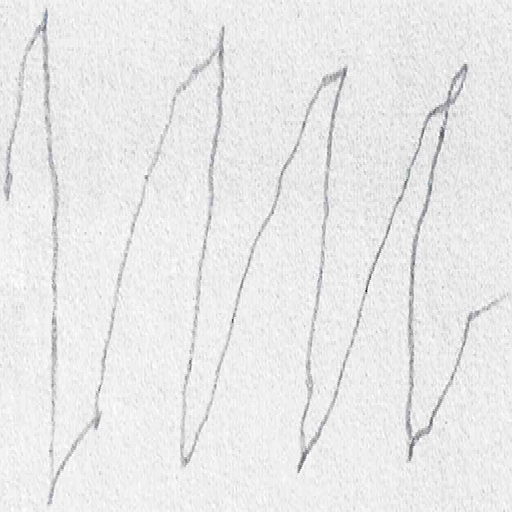

In [36]:
load_img("./wave/testing/parkinson/V03PO01.png",target_size=(512,512))

In [37]:
image2=load_img("./wave/testing/parkinson/V03PO01.png",target_size=(100,100))

image2=img_to_array(image2) 
image2=image2/255.0
prediction_image2=np.array(image2)
prediction_image2=np.expand_dims(image2, axis=0)

prediction2=model1.predict(prediction_image2)
value2=np.argmax(prediction2)
move_name2=mapper(value2)
print(f"Prediction using model 1 is {move_name2}.")

prediction2=model2.predict(prediction_image2)
value2=np.argmax(prediction2)
move_name2=mapper(value2)
print(f"Prediction using model 2 is {move_name2}.")

prediction2=model3.predict(prediction_image2)
value2=np.argmax(prediction2)
move_name2=mapper(value2)
print(f"Prediction using model 3 is {move_name2}.")

prediction2=model4.predict(prediction_image2)
value2=np.argmax(prediction2)
move_name2=mapper(value2)
print(f"Prediction using model 4 is {move_name2}.")

1/1 [==============================] - 0s 83ms/step
Prediction using model 1 is parkinson.
1/1 [==============================] - 0s 33ms/step
Prediction using model 2 is healthy.
1/1 [==============================] - 0s 57ms/step
Prediction using model 3 is healthy.
1/1 [==============================] - 0s 57ms/step
Prediction using model 4 is parkinson.


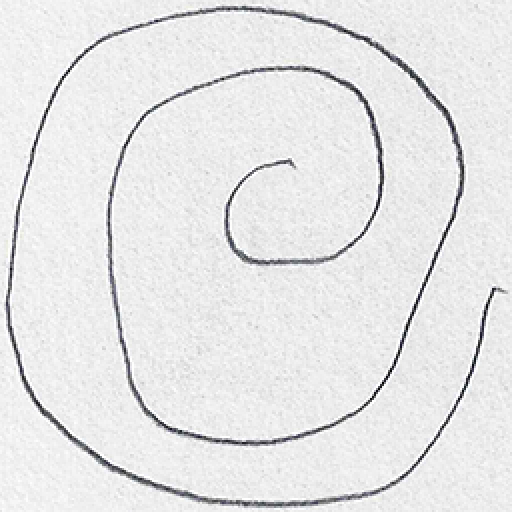

In [38]:
load_img("./spiral/testing/healthy/V01HE01.png",target_size=(512,512))

In [39]:
image3=load_img("./spiral/testing/healthy/V01HE01.png",target_size=(100,100))

image3=img_to_array(image3) 
image3=image3/255.0
prediction_image3=np.array(image3)
prediction_image3=np.expand_dims(image3, axis=0)

prediction3=model1.predict(prediction_image3)
value3=np.argmax(prediction3)
move_name3=mapper(value3)
print(f"Prediction using model 1 is {move_name3}.")

prediction3=model2.predict(prediction_image3)
value3=np.argmax(prediction3)
move_name3=mapper(value3)
print(f"Prediction using model 2 is {move_name3}.")

prediction3=model3.predict(prediction_image3)
value3=np.argmax(prediction3)
move_name3=mapper(value3)
print(f"Prediction using model 3 is {move_name3}.")

prediction3=model4.predict(prediction_image3)
value3=np.argmax(prediction3)
move_name3=mapper(value3)
print(f"Prediction using model 4 is {move_name3}.")

1/1 [==============================] - 0s 90ms/step
Prediction using model 1 is healthy.
1/1 [==============================] - 0s 32ms/step
Prediction using model 2 is healthy.
1/1 [==============================] - 0s 56ms/step
Prediction using model 3 is parkinson.
1/1 [==============================] - 0s 64ms/step
Prediction using model 4 is healthy.


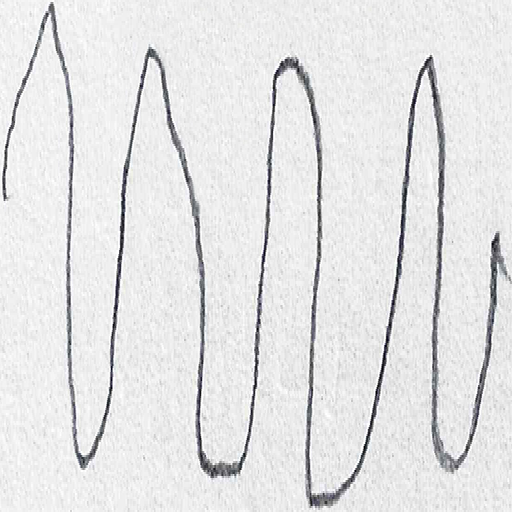

In [40]:
load_img("./wave/testing/healthy/V01HO01.png",target_size=(512,512))

In [41]:
image4=load_img("./wave/testing/healthy/V01HO01.png",target_size=(100,100))

image4=img_to_array(image4) 
image4=image4/255.0
prediction_image4=np.array(image4)
prediction_image4=np.expand_dims(image4, axis=0)

prediction4=model1.predict(prediction_image4)
value4=np.argmax(prediction4)
move_name4=mapper(value4)
print(f"Prediction using model 1 is {move_name4}.")

prediction4=model2.predict(prediction_image4)
value4=np.argmax(prediction4)
move_name4=mapper(value4)
print(f"Prediction using model 2 is {move_name4}.")

prediction4=model3.predict(prediction_image4)
value4=np.argmax(prediction4)
move_name4=mapper(value4)
print(f"Prediction using model 3 is {move_name4}.")

prediction4=model4.predict(prediction_image4)
value4=np.argmax(prediction4)
move_name4=mapper(value4)
print(f"Prediction using model 4 is {move_name4}.")

1/1 [==============================] - 0s 80ms/step
Prediction using model 1 is healthy.
1/1 [==============================] - 0s 33ms/step
Prediction using model 2 is healthy.
1/1 [==============================] - 0s 55ms/step
Prediction using model 3 is parkinson.
1/1 [==============================] - 0s 58ms/step
Prediction using model 4 is healthy.


In [42]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# define the directory path and image dimensions
root_test_dir = './drawings/'
img_width, img_height = 100, 100

# define a function to get the predicted label from the model's output
def get_label(prediction):
    if prediction[0] < prediction[1]:
        return 'parkinson'
    else:
        return 'healthy'


# initialize variables to keep track of the number of correctly predicted labels
models = [model1, model2, model3, model4]
num_correct = 0
total_images = 0
prevs=[0]

for i, model in enumerate(models):
    j=0
    print(f'Predictions using model {i+1}:')
    # iterate through all the images in the testing directory
    for subdir1, dirs1, files1 in os.walk(root_test_dir):
        for subdir2, dirs2, files2 in os.walk(subdir1):
            if j==4:
                break
            if "testing\\" in subdir2:
                j+=1
                for file in files2:
                    # load the image
                    image = load_img(os.path.join(subdir2, file), target_size=(img_width, img_height))
                    
                    image=img_to_array(image) 
                    
                    image=image/255.0
                    
                    prediction_image=np.array(image)
                    
                    prediction_image=np.expand_dims(image, axis=0)
                    
                    prediction=model.predict(prediction_image,verbose=0)
                    
                    value=np.argmax(prediction)
                    
                    predicted_label=mapper(value)
                    # get the actual label from the directory structure
                    actual_label = os.path.basename(subdir2)
                    
                    # increment the counters based on whether the prediction was correct
                    if predicted_label == actual_label:
                        num_correct += 1
                    total_images += 1
    # print the accuracy for this model
    
    accuracy = num_correct / total_images
    print(f'Accuracy using model {i+1} is {accuracy:.2f} (scored {num_correct}/{total_images})')
    prevs.append(num_correct)
    num_correct = 0
    total_images = 0


Predictions using model 1:
Accuracy using model 1 is 0.88 (scored 53/60)
Predictions using model 2:
Accuracy using model 2 is 0.78 (scored 47/60)
Predictions using model 3:
Accuracy using model 3 is 0.55 (scored 33/60)
Predictions using model 4:
Accuracy using model 4 is 0.73 (scored 44/60)


In [43]:
# saving models so next time we can load them directly instead of training again
# model1.save("model1.h5")
# model2.save("model2.h5")
# model3.save("model3.h5")
# model4.save("model4.h5")

#loading models
# from tensorflow.keras.models import load_model
# model1 = load_model("model1.h5")
# model2 = load_model("model2.h5")
# model3 = load_model("model3.h5")
# model4 = load_model("model4.h5")

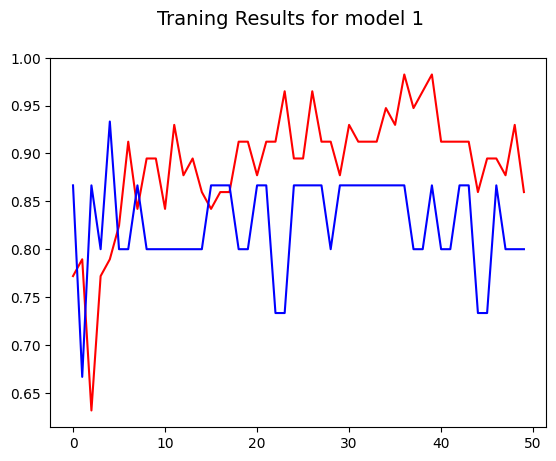

In [49]:
get_acc1s = his1s.history['accuracy']
value_acc1s = his1s.history['val_accuracy']
get_loss1s = his1s.history['loss']
validation_loss1s = his1s.history['val_loss']

get_acc1w = his1w.history['accuracy']
value_acc1w = his1w.history['val_accuracy']
get_loss1w = his1w.history['loss']
validation_loss1w = his1w.history['val_loss']

plt.figure()
plt.suptitle('Traning Results for model 1', fontsize=14)
epochs1s = range(len(get_acc1s))
plt.plot(epochs1s, get_acc1s, 'r', label='Accuracy of Training spiral data')
plt.plot(epochs1s, value_acc1s, 'b', label='Accuracy of Validation  spiraldata')



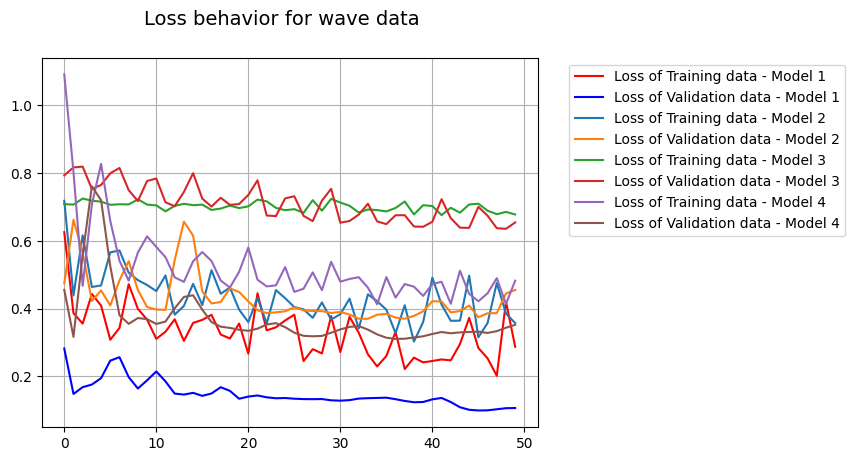

In [57]:


epochs1w = range(len(get_loss1w))
plt.suptitle('Loss behavior for wave data', fontsize=14)
plt.plot(epochs1w, get_loss1w, 'r', label='Loss of Training data - Model 1')
plt.plot(epochs1w, validation_loss1w, 'b', label='Loss of Validation data - Model 1')

epochs2w = range(len(get_loss2w))
plt.plot(epochs2w, get_loss2w, label='Loss of Training data - Model 2')
plt.plot(epochs2w, validation_loss2w, label='Loss of Validation data - Model 2')

epochs3w = range(len(get_loss3w))
plt.plot(epochs3w, get_loss3w,  label='Loss of Training data - Model 3')
plt.plot(epochs3w, validation_loss3w,  label='Loss of Validation data - Model 3')

epochs4w = range(len(get_loss4w))
plt.plot(epochs4w, get_loss4w, label='Loss of Training data - Model 4')
plt.plot(epochs4w, validation_loss4w,  label='Loss of Validation data - Model 4')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True)


plt.show()